In [37]:
import cv2
import os
import numpy as np
from sklearn import svm,metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import itertools
from sklearn.model_selection import train_test_split,GridSearchCV
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle
from sklearn.metrics import roc_curve, auc

In [15]:
def svc_param_selection(X, y, nfolds):
    Cs = [0.01, 0.1, 1, 10,100]
    gammas = [0.001, 0.01, 0.1, 1,1e-1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [16]:
images_train=[]
label_train=[]
i=1
folder="Train_val"
for filename in os.listdir(folder):
    path=folder+"/"+filename
    for file in os.listdir(path):
        img = cv2.imread(os.path.join((os.path.join(folder,filename)),file))
        if img is not None:
                images_train.append(img)
                label_train.append(i)
    i=i+1
images_train=np.array(images_train)
label_train=np.array((label_train))

In [17]:
images_test=[]
label_test=[]
i=1
folder1="test_val"
for filename in os.listdir(folder1):
    if filename != '.DS_Store':
        path=folder1+"/"+filename
        for file in os.listdir(path):
            img = cv2.imread(os.path.join((os.path.join(folder1,filename)),file))
            if img is not None:
                    images_test.append(img)
                    label_test.append(i)
        i=i+1
images_test=np.array(images_test)
label_test=np.array((label_test))
np.unique(label_test)

array([1, 2, 3, 4, 5])

In [18]:
image_train, image_val, label_train, label_val = train_test_split(images_train, label_train, test_size=0.2, random_state=33)

In [19]:
image_train.shape
image_train= image_train.reshape(6800,-1)


In [20]:
images_test.shape
images_test= images_test.reshape(1500,-1)


In [21]:
image_train.shape
image_vall= image_val.reshape(1700,-1)


In [25]:
# param=svc_param_selection(image_train, label_train, 5)
# print(param)

In [26]:
clssifier=svm.SVC(kernel='poly',gamma=1e-1)
clssifier.fit(image_train,label_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [27]:
predicted_val=clssifier.predict(image_vall)

In [28]:
print('Accuracy on Validation Set',accuracy_score(label_val,predicted_val))

Accuracy on Validation Set 0.9776470588235294


Accuracy on Validation Set 0.9776470588235294
F1-Score on Validation Set 0.9777704749753635
Predicted    1    2    3    4    5
Correct                           
1          333    1    1    0    2
2            6  347    2    2    2
3            0    4  328    0    3
4            2    3    0  334    1
5            2    4    2    1  320


<Figure size 432x288 with 0 Axes>

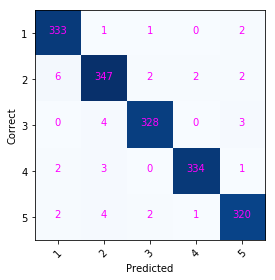

<Figure size 432x288 with 0 Axes>

In [29]:
print('Accuracy on Validation Set',accuracy_score(label_val,predicted_val))
print('F1-Score on Validation Set',f1_score(label_val,predicted_val,average='macro'))
actu=pd.Series(label_val,name='Correct')
pred=pd.Series(predicted_val,name='Predicted')
confusion_mat= pd.crosstab(actu,pred,rownames=['Correct'],colnames=['Predicted'])
print(confusion_mat)
plt.imshow(confusion_mat,interpolation='nearest', cmap=plt.cm.Blues)
tick_marks = np.arange(len(confusion_mat.columns))
plt.xticks(tick_marks, confusion_mat.columns, rotation=45)
plt.yticks(tick_marks, confusion_mat.index)
for i in range(1,6):
    for j in range(1,6):
        plt.text(i-1,j-1,confusion_mat[i][j],horizontalalignment="center",color="magenta")
plt.ylabel(confusion_mat.index.name)
plt.xlabel(confusion_mat.columns.name)
plt.tight_layout()
plt.figure()

In [30]:
print(confusion_mat[2][1])

1


In [31]:
predicted_test=clssifier.predict(images_test)

Accuracy on Test Set 0.9826666666666667
F1-Score on Test Set 0.9826939917816885
Predicted    1    2    3    4    5
Correct                           
1          296    1    2    0    1
2            2  296    2    0    0
3            2    0  297    0    1
4            1    5    0  294    0
5            1    5    3    0  291


<Figure size 432x288 with 0 Axes>

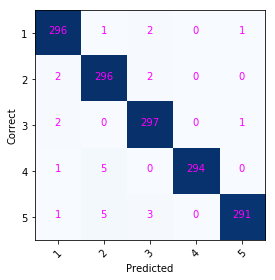

<Figure size 432x288 with 0 Axes>

In [32]:
print('Accuracy on Test Set',accuracy_score(label_test,predicted_test))
print('F1-Score on Test Set',f1_score(label_test,predicted_test,average='macro'))
actu=pd.Series(label_test,name='Correct')
pred=pd.Series(predicted_test,name='Predicted')
confusion_mat= pd.crosstab(actu,pred,rownames=['Correct'],colnames=['Predicted'])
print(confusion_mat)
plt.imshow(confusion_mat,interpolation='nearest', cmap=plt.cm.Blues)
tick_marks = np.arange(len(confusion_mat.columns))
plt.xticks(tick_marks, confusion_mat.columns, rotation=45)
plt.yticks(tick_marks, confusion_mat.index)

for i in range(1,6):
    for j in range(1,6):
        plt.text(i-1,j-1,confusion_mat[i][j],horizontalalignment="center",color="magenta")
plt.ylabel(confusion_mat.index.name)
plt.xlabel(confusion_mat.columns.name)
plt.tight_layout()
plt.figure()

/Users/nikitamehrotra/Downloads/assignment1/env/lib/python3.7/site-packages/sklearn/metrics/ranking.py:651: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


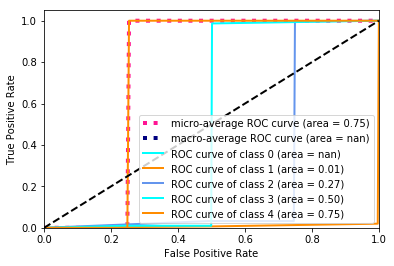

In [40]:
n_class=5
y_score = label_test
y_binary = label_binarize(predicted_test, classes=[0, 1, 2,3,4]) 
fpr = dict() 
tpr = dict() 
roc_auc = dict() 
lw=2 
for i in range(n_class): 
    fpr[i], tpr[i], _ = roc_curve(y_binary[:, i], y_score) 
    roc_auc[i] = auc(fpr[i], tpr[i]) 
    fpr["micro"], tpr["micro"], _ = roc_curve(y_binary[:,i].ravel(), y_score.ravel()) 
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"]) 
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_class)])) 
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_class): 
    mean_tpr += interp(all_fpr, fpr[i], tpr[i]) 
mean_tpr /= n_class
fpr["macro"] = all_fpr 
tpr["macro"] = mean_tpr 
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"]) 
plt.figure() 
plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC curve (area = {0:0.2f})' ''.format(roc_auc["micro"]), color='deeppink', linestyle=':', linewidth=4) 
plt.plot(fpr["macro"], tpr["macro"], label='macro-average ROC curve (area = {0:0.2f})' ''.format(roc_auc["macro"]), color='navy', linestyle=':', linewidth=4) 
colors = cycle(['aqua', 'darkorange', 'cornflowerblue']) 
for i,color in zip(range(n_class), colors): 
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i])) 
plt.plot([0, 1], [0, 1], 'k--', lw=lw) 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc="lower right")